In [1]:
#Public Domain Data set: 911 calls - Seattle Fire Department
#Available at: https://data.seattle.gov/Public-Safety/Seattle-Real-Time-Fire-911-Calls/kzjm-xkqj

#Why is this data set important?
#By doing analysis of this dataset we could try to understand whether emergency response 
#team is well equipped to deal with emergencies or not. We could also get to know about the 
#frequency of emergency.

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Latex
import gc

#function for in-notebook display
%matplotlib inline                 

In [3]:
#Loading the dataset
Df = pd.read_csv('Seattle_Real_Time_Fire_911_Calls.csv')

In [4]:
Df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
0,904 7th Av,Car Fire,05/22/2019 12:55:00 PM,47.606900,-122.329051,POINT (-122.329051 47.6069),F190051945
1,9610 53rd Av S,Aid Response,05/22/2019 12:55:00 PM,47.515984,-122.266529,POINT (-122.266529 47.515984),F190051946
2,106 Pike St,Aid Response,05/22/2019 12:57:00 PM,47.608849,-122.339945,POINT (-122.339945 47.608849),F190051950
3,1902 2nd Av,Aid Response,07/01/2019 07:45:00 AM,47.610972,-122.340465,POINT (-122.340465 47.610972),F190068848
4,4737 Roosevelt Way Ne,Unk Odor,07/01/2019 07:45:00 AM,47.663338,-122.317421,POINT (-122.317421 47.663338),F190068849


In [5]:
#Informations about the dataframe Df
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823060 entries, 0 to 1823059
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Address          object 
 1   Type             object 
 2   Datetime         object 
 3   Latitude         float64
 4   Longitude        float64
 5   Report Location  object 
 6   Incident Number  object 
dtypes: float64(2), object(5)
memory usage: 97.4+ MB


In [6]:
#Number of rows and columns
Df.shape

(1823060, 7)

In [7]:
#Check for NaN under the DataFrame column Datetime:
Df['Datetime'].isnull().values.any()

False

#We have no NaN values in the column Datetime

In [8]:
#Checking the types of variables in the data frame
Df.dtypes

Address             object
Type                object
Datetime            object
Latitude           float64
Longitude          float64
Report Location     object
Incident Number     object
dtype: object

In [ ]:
#Note that the Datetime column is currently of a string-type object.
#Let’s parse this to datetime, as shown:
#Remark: this process can take some time for long data sets
Df['Datetime'] = pd.to_datetime(Df['Datetime'])
print(type(Df['Datetime']))

In [179]:
#Now, we can check that Datetime column is a datetime object
Df.dtypes

Address                    object
Type                       object
Datetime           datetime64[ns]
Latitude                  float64
Longitude                 float64
Report Location            object
Incident Number            object
dtype: object

In [180]:
# Sort DataFrame by date column
Df.sort_values(by='Datetime', inplace = True)

In [181]:
Df.head(10)

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
1996,507 W Mercer St,Medic Response,2003-11-07 09:30:48,47.624608,-122.363505,POINT (-122.363505 47.624608),F030080834
1997,4104 Meridian Av N,Medic Response,2003-11-07 09:31:47,47.656799,-122.333806,POINT (-122.333806 47.656799),F030080835
1998,11650 Beacon Av S,Auto Fire Alarm,2003-11-07 09:43:15,47.498464,-122.263967,POINT (-122.263967 47.498464),F030080841
1999,1518 Nw 60th St,1RED 1 Unit,2003-11-07 09:50:05,47.672360,-122.376440,POINT (-122.37644 47.67236),F030080842
2000,8499 Tillicum Rd Sw,Aid Response Yellow,2003-11-07 09:56:10,47.527277,-122.388451,POINT (-122.388451 47.527277),F030080843
2001,4515 25th Av Ne,Aid Response,2003-11-07 10:00:57,47.661508,-122.300905,POINT (-122.300905 47.661508),F030080844
2002,533 3rd Av W,Medic Response,2003-11-07 10:03:33,47.623717,-122.360635,POINT (-122.360635 47.623717),F030080845
2003,4450 Green Lake Way N,Medic Response,2003-11-07 10:10:22,47.660979,-122.347002,POINT (-122.347002 47.660979),F030080846
2004,7740 34th Av Sw,Auto Fire Alarm,2003-11-07 10:14:36,47.533369,-122.375255,POINT (-122.375255 47.533369),F030080847
2005,2121 26TH AV S,Aid Response,2003-11-07 10:17:58,47.584234,-122.299024,POINT (-122.299024 47.584234),F030080848


In [182]:
#The first call in the Dataframe?
Df['Datetime'].iloc[0]

Timestamp('2003-11-07 09:30:48')

In [183]:
#The last call in the Dataframe?
Df['Datetime'].iloc[1823059]

Timestamp('2023-07-28 07:27:00')

In [184]:
#Let's reset the index of the rows
Df = Df.reset_index()

In [185]:
#Delete the column index
Df.drop(labels='index', axis=1,inplace=True)
Df.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
0,507 W Mercer St,Medic Response,2003-11-07 09:30:48,47.624608,-122.363505,POINT (-122.363505 47.624608),F030080834
1,4104 Meridian Av N,Medic Response,2003-11-07 09:31:47,47.656799,-122.333806,POINT (-122.333806 47.656799),F030080835
2,11650 Beacon Av S,Auto Fire Alarm,2003-11-07 09:43:15,47.498464,-122.263967,POINT (-122.263967 47.498464),F030080841
3,1518 Nw 60th St,1RED 1 Unit,2003-11-07 09:50:05,47.672360,-122.376440,POINT (-122.37644 47.67236),F030080842
4,8499 Tillicum Rd Sw,Aid Response Yellow,2003-11-07 09:56:10,47.527277,-122.388451,POINT (-122.388451 47.527277),F030080843
...,...,...,...,...,...,...,...
1823055,11 W Aloha St,Aid Response,2023-07-28 06:56:00,47.627192,-122.356823,POINT (-122.356823 47.627192),F230095629
1823056,4th Ave S / S Royal Brougham Way,Natural Gas Odor,2023-07-28 07:01:00,47.592394,-122.329049,POINT (-122.329049 47.592394),F230095631
1823057,915 2nd Ave,Aid Response,2023-07-28 07:07:00,47.604548,-122.334570,POINT (-122.33457 47.604548),F230095632
1823058,300 E Thomas St,Medic Response,2023-07-28 07:21:00,47.620827,-122.327861,POINT (-122.327861 47.620827),F230095633


In [186]:
#Let's export the reindexed dataframe to a new csv file
Df.to_csv('Seattle_Real_Time_Fire_911_Calls_reindexed')

In [9]:
#delete the dataframe Df from the memory
del Df
# Perform garbage collection
gc.collect()

0

In [11]:
#reading the new dataframe
#The dataframe Df_1 is sorted by datetime
Df_1 = pd.read_csv('Seattle_Real_Time_Fire_911_Calls_reindexed')

In [12]:
Df_1.dtypes


Unnamed: 0           int64
Address             object
Type                object
Datetime            object
Latitude           float64
Longitude          float64
Report Location     object
Incident Number     object
dtype: object

In [13]:
#We want to work with data from 2015 til 2023 (we want to delete old information)
#We have to delete all the rows before the year 2015
#To do it, we will transform the column Datetime of Df_1 into datetime object's column, 
#latter, we will create a new column called Date containing only the date (with no time)

#Note that the Datetime column is currently of a string-type object.
#Let’s parse this to datetime, as shown:
Df_1['Datetime'] = pd.to_datetime(Df_1['Datetime'])

In [14]:
Df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823060 entries, 0 to 1823059
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Unnamed: 0       int64         
 1   Address          object        
 2   Type             object        
 3   Datetime         datetime64[ns]
 4   Latitude         float64       
 5   Longitude        float64       
 6   Report Location  object        
 7   Incident Number  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 111.3+ MB


In [15]:
Df_1.shape

(1823060, 8)

In [16]:
#Creating a column with Dates
Df_1['Date']=Df_1['Datetime'].dt.date
#Converting the column Date to strings
Df_1['Date']=Df_1['Date'].astype(str)

In [17]:
#Checking the label of the first call in 2015
Df_1[Df_1['Date']=='2015-01-01'].head(1)

,Unnamed: 0,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date
924346,924346,2132 1st Av,Aid Response,2015-01-01 00:02:42,47.61208,-122.344324,POINT (-122.344324 47.61208),F150000003,2015-01-01


In [19]:
#The index of the first call in 2015 is 924346
#Let's drop all the rows before the label 924346
j=924346
Df_2=Df_1.drop(Df_1.index[0:j],axis=0,inplace=False)

In [20]:
#The new dataframe with no information prior 2015
Df_2.head()

,Unnamed: 0,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date
924346,924346,2132 1st Av,Aid Response,2015-01-01 00:02:42,47.612080,-122.344324,POINT (-122.344324 47.61208),F150000003,2015-01-01
924347,924347,224 Pontius Av N,Auto Fire Alarm,2015-01-01 00:04:58,47.619935,-122.331699,POINT (-122.331699 47.619935),F150000004,2015-01-01
924348,924348,367 Prospect St,Illegal Burn,2015-01-01 00:12:02,47.628920,-122.349685,POINT (-122.349685 47.62892),F150000008,2015-01-01
924349,924349,1522 6th Av,Aid Response,2015-01-01 00:12:16,47.611355,-122.334659,POINT (-122.334659 47.611355),F150000009,2015-01-01
924350,924350,42nd Av Sw / Sw Alaska St,Aid Response,2015-01-01 00:12:28,47.561101,-122.385457,POINT (-122.385457 47.561101),F150000010,2015-01-01


In [21]:
#delete the dataframe Df_1 from the memory
del Df_1
# Perform garbage collection
gc.collect()

540

In [22]:
#Deleting the column Unnamed: 0
Df_2.drop(labels='Unnamed: 0', axis=1,inplace=True)

#Let's reset the index of the rows
Df_2 = Df_2.reset_index()
Df_2.head()

#Deleting the column index
Df_2.drop(labels='index', axis=1,inplace=True)

In [23]:
#The new dataframe reindexed with no information prior 2015
Df_2.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date
0,2132 1st Av,Aid Response,2015-01-01 00:02:42,47.612080,-122.344324,POINT (-122.344324 47.61208),F150000003,2015-01-01
1,224 Pontius Av N,Auto Fire Alarm,2015-01-01 00:04:58,47.619935,-122.331699,POINT (-122.331699 47.619935),F150000004,2015-01-01
2,367 Prospect St,Illegal Burn,2015-01-01 00:12:02,47.628920,-122.349685,POINT (-122.349685 47.62892),F150000008,2015-01-01
3,1522 6th Av,Aid Response,2015-01-01 00:12:16,47.611355,-122.334659,POINT (-122.334659 47.611355),F150000009,2015-01-01
4,42nd Av Sw / Sw Alaska St,Aid Response,2015-01-01 00:12:28,47.561101,-122.385457,POINT (-122.385457 47.561101),F150000010,2015-01-01


In [24]:
#We want to generate a list of observations of the variable X, the times in minutes between calls
#to 911
List=[]
j=len(Df_2['Datetime'])
for i in range(0,j):
    if i==0:
        List.append(0)
    else:
        List.append(round((Df_2['Datetime'].iloc[i]-Df_2['Datetime'].iloc[i-1]).seconds/60, 2))


In [25]:
#Appending a the new column to the dataframe 'Minutes between calls'
se = pd.Series(List)
Df_2['Minutes between calls'] = se.values

In [26]:
Df_2.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date,Minutes between calls
0,2132 1st Av,Aid Response,2015-01-01 00:02:42,47.612080,-122.344324,POINT (-122.344324 47.61208),F150000003,2015-01-01,0.00
1,224 Pontius Av N,Auto Fire Alarm,2015-01-01 00:04:58,47.619935,-122.331699,POINT (-122.331699 47.619935),F150000004,2015-01-01,2.27
2,367 Prospect St,Illegal Burn,2015-01-01 00:12:02,47.628920,-122.349685,POINT (-122.349685 47.62892),F150000008,2015-01-01,7.07
3,1522 6th Av,Aid Response,2015-01-01 00:12:16,47.611355,-122.334659,POINT (-122.334659 47.611355),F150000009,2015-01-01,0.23
4,42nd Av Sw / Sw Alaska St,Aid Response,2015-01-01 00:12:28,47.561101,-122.385457,POINT (-122.385457 47.561101),F150000010,2015-01-01,0.20


<Axes: xlabel='Minutes between calls', ylabel='Count'>

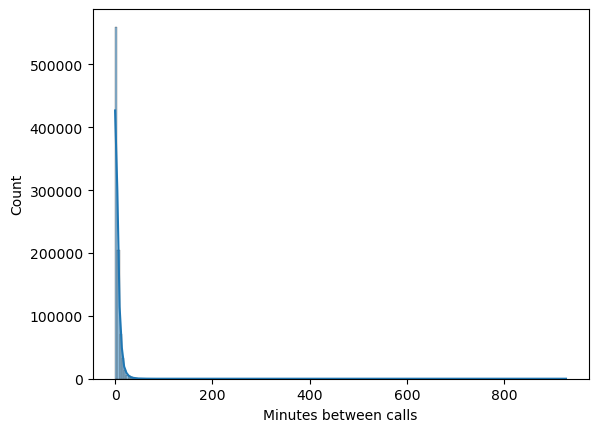

In [27]:
#Histogram of the column Minutes between calls
#sns.displot(Df_2['Minutes between calls'],kde=True,bins=100)
sns.histplot(data=Df_2, x='Minutes between calls', bins=200, kde=True)
#Df_2.hist(column='Minutes between calls',bins=100)

In [52]:
#Let's construct an histogram of minutes between calls considering solelly the data type 'auto fire alarms' 
#The index of the first call in dataframe Df_1 in 2015 is 924346
#Let's drop all the rows before the label 924346
#j=924346
#Df_3=Df_1.drop(Df_1.index[0:j],axis=0,inplace=False)

In [28]:
#Selecting only the rows with type 'auto fire alarm'
Df_3=Df_2[Df_2['Type']=='Auto Fire Alarm']

#Deleting the column Unnamed: 0
#del Df_3['Unnamed: 0']

#Let's reset the index of the rows
Df_3 = Df_3.reset_index()

del Df_3['index']

Df_3.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date,Minutes between calls
0,224 Pontius Av N,Auto Fire Alarm,2015-01-01 00:04:58,47.619935,-122.331699,POINT (-122.331699 47.619935),F150000004,2015-01-01,2.27
1,1433 12th Av,Auto Fire Alarm,2015-01-01 00:24:38,47.613286,-122.316767,POINT (-122.316767 47.613286),F150000022,2015-01-01,1.00
2,311 E Republican St,Auto Fire Alarm,2015-01-01 00:41:52,47.623133,-122.327173,POINT (-122.327173 47.623133),F150000041,2015-01-01,0.58
3,219 Pontius Av N,Auto Fire Alarm,2015-01-01 01:12:22,47.619877,-122.331698,POINT (-122.331698 47.619877),F150000063,2015-01-01,0.20
4,1011 E Terrace St,Auto Fire Alarm,2015-01-01 02:39:53,47.605202,-122.319267,POINT (-122.319267 47.605202),F150000129,2015-01-01,6.87


In [29]:
#Let's export the dataframe Df_2 to a new csv file
Df_2.to_csv('Df_2')

In [30]:
#delete the dataframe Df_2 from the memory
del Df_2
# Perform garbage collection
gc.collect()

86

In [31]:
#Working on the dataframe Df_3
List=[]
j=len(Df_3['Datetime'])
for i in range(0,j):
    if i==0:
        List.append(0)
    else:
        List.append(round((Df_3['Datetime'].iloc[i]-Df_3['Datetime'].iloc[i-1]).seconds/60, 0))

In [32]:
#Changing the column 'Minutes between calls' of the dataframe Df_3
se = pd.Series(List)
Df_3['Minutes between calls'] = se.values

In [33]:
Df_3.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date,Minutes between calls
0,224 Pontius Av N,Auto Fire Alarm,2015-01-01 00:04:58,47.619935,-122.331699,POINT (-122.331699 47.619935),F150000004,2015-01-01,0.0
1,1433 12th Av,Auto Fire Alarm,2015-01-01 00:24:38,47.613286,-122.316767,POINT (-122.316767 47.613286),F150000022,2015-01-01,20.0
2,311 E Republican St,Auto Fire Alarm,2015-01-01 00:41:52,47.623133,-122.327173,POINT (-122.327173 47.623133),F150000041,2015-01-01,17.0
3,219 Pontius Av N,Auto Fire Alarm,2015-01-01 01:12:22,47.619877,-122.331698,POINT (-122.331698 47.619877),F150000063,2015-01-01,30.0
4,1011 E Terrace St,Auto Fire Alarm,2015-01-01 02:39:53,47.605202,-122.319267,POINT (-122.319267 47.605202),F150000129,2015-01-01,88.0


<Axes: xlabel='Minutes between calls', ylabel='Count'>

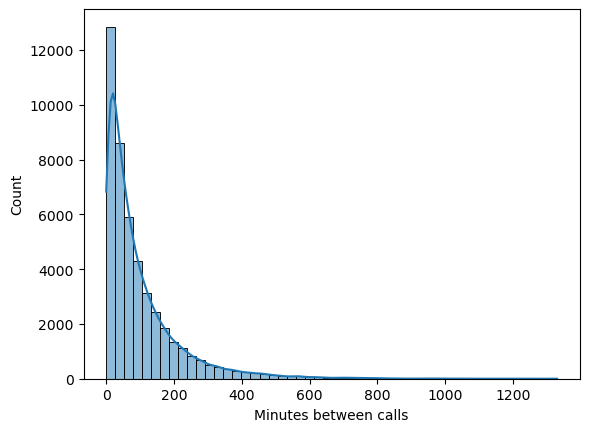

In [34]:
#Histogram of the column Minutes between calls for auto fire alarms data type
#sns.displot(Df_2['Minutes between calls'],kde=True,bins=100)
sns.histplot(data=Df_3, x='Minutes between calls', bins=50, kde=True)
#Df_2.hist(column='Minutes between calls',bins=50)

In [58]:
%%latex
Note that, the exponential probability density function is perhaps the most appropriate to model 
the times in minutes between 911 calls of type Auto fire alarm. This PDF is given by: 
    
$$f(\lambda,x)=\begin{cases} \lambda e^{-\lambda x},\, x\geq 0 \\
                              0,\, x<0 \end{cases}$$

Here $\lambda >0$ is the parameter of the distribution, often called the rate parameter. 

<IPython.core.display.Latex object>

In [37]:
#delete the dataframe Df_3 from the memory
del Df_3
# Perform garbage collection
gc.collect()

1607

In [3]:
#Which are the 5 more often types of emergency calls?
Df_2 = pd.read_csv('Df_2')
Df_2['Type'].value_counts().head(5)

Aid Response                    444126
Medic Response                  118493
Trans to AMR                     51719
Auto Fire Alarm                  45957
MVI - Motor Vehicle Incident     21745
Name: Type, dtype: int64

In [4]:
#What are the 5 address with more emergencies calls? 
Df_2['Address'].value_counts().head(5)

517 3rd Av          4308
318 2nd Av Et  S    3119
1811 Eastlake Av    2510
500 5th Av          2015
509 3rd Av          2004
Name: Address, dtype: int64

In [5]:
#delete the dataframe Df_2 from the memory
del Df_2
# Perform garbage collection
gc.collect()

0

In [3]:
#Lets's study the increasing (decreasing) of emergency call coming from the 3rd Av troghout the years
#First, lets make a copy of the full dataframe Df_1
Df_3rAv = pd.read_csv('Df_2')

In [23]:
#Check for NaN under the column Address:
#Df_3rAv['Address'].isna().sum()
Df_3rAv.dtypes

Unnamed: 0                 int64
Address                   object
Type                      object
Datetime                  object
Latitude                 float64
Longitude                float64
Report Location           object
Incident Number           object
Date                      object
Minutes between calls    float64
dtype: object

In [4]:
#Selecting the rows we will delete: we are interested in the rows with calls from 3rd Av
List=[]
j=len(Df_3rAv['Address'])
for i in range(0,j):
    x=Df_3rAv['Address'].iloc[i]
    if type(x)!=str:
        List.append(i)
    elif '3rd Av' in x:
        continue
    else:
        List.append(i)
        


In [5]:
#Delete rows by index
Df_3rAv=Df_3rAv.drop(Df_3rAv.index[List],axis=0)

In [6]:
#delete Unnamed: 0 column
del Df_3rAv['Unnamed: 0']

#Let's reset the index of the rows
Df_3rAv = Df_3rAv.reset_index()

del Df_3rAv['index']

Df_3rAv.head()

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Date,Minutes between calls
0,3rd Av / Lenora St,Aid Response,2015-01-01 00:34:59,47.613167,-122.342193,POINT (-122.342193 47.613167),F150000034,2015-01-01,0.40
1,1524 3rd Av,Aid Response,2015-01-01 01:21:37,47.609983,-122.338006,POINT (-122.338006 47.609983),F150000070,2015-01-01,5.60
2,2030 3rd Av,Medic Response,2015-01-01 02:06:26,47.612626,-122.341277,POINT (-122.341277 47.612626),F150000104,2015-01-01,3.13
3,5926 23rd Av S,Aid Response,2015-01-01 06:31:43,47.549471,-122.304296,POINT (-122.304296 47.549471),F150000193,2015-01-01,0.38
4,3rd Av / Pine St,Aid Response,2015-01-01 07:30:16,47.610743,-122.338702,POINT (-122.338702 47.610743),F150000201,2015-01-01,3.47


In [7]:
Df_3rAv.dtypes

Address                   object
Type                      object
Datetime                  object
Latitude                 float64
Longitude                float64
Report Location           object
Incident Number           object
Date                      object
Minutes between calls    float64
dtype: object

In [8]:
#Creating a column with years
def year_func(n):
    y=n.split('-')[0]
    return y
    
Df_3rAv['Year'] = Df_3rAv['Date'].apply(lambda x : year_func(x))


In [9]:
#Creating a column of 1's
se = pd.Series([1] * len(Df_3rAv['Year']))
Df_3rAv['Counting']=se.values

In [10]:
#Delete some unecessary columns
Df_3rAv.drop(columns=['Address', 'Type','Datetime','Latitude', 'Longitude','Report Location','Incident Number','Date','Minutes between calls'],inplace=True)

In [11]:
#Grounpying by Year
Df_3rAv=Df_3rAv.groupby(by=["Year"]).sum('numeric_only')

In [12]:
Df_3rAv=Df_3rAv.drop(Df_3rAv.index[-1],axis=0)

In [13]:
Df_3rAv

,Counting
Year,
2015,6504
2016,6686
2017,6796
2018,6963
2019,6819
2020,5580
2021,6127
2022,6780


<Axes: xlabel='Year'>

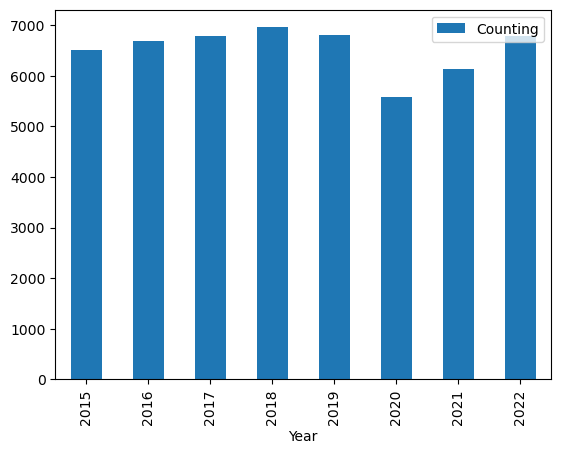

In [14]:
Df_3rAv.plot.bar()

In [ ]:
#Note that the number of emergency calls at 3r Av flutuates betweens 5500 and 7000 throughout the years.
#In 2020 we had the start of covid-19 pandemic. May it have affected the number of emergency calls in the 
#years 2020, 2021 and 2022?